# Baseball Case Study Project

In [4]:
from IPython.display import Image
Image(url= "https://bloximages.newyork1.vip.townnews.com/dothaneagle.com/content/tncms/assets/v3/editorial/0/b2/0b28042e-6dae-11eb-97c2-8f164877b14e/60274ba4c866b.image.jpg?resize=1200%2C800")

## Introduction

### The game consists of 9 innings, usually Both teams get to bat each inning A team's at-bat is over when they get 3 outs in an inning. In Major League Baseball, there are two leagues - the National League and the American League, and they have slightly different rules.

### There are 25 players on each team. There are 9 defensive positions:

#### Pitcher
#### Catcher
#### First base
#### Second base
#### Third base
#### Shortstop
#### Left field
#### Center field
#### Right field
### A team typically uses multiple pitchers in a game. There is a pitcher who starts the game, called the starting pitcher, and there are relief pitchers, pitchers who replace the starting pitcher late in the game. The other players, called position players, typically play the whole game, but not always. They can be replaced at any time by a bench player, an extra player who didn't start the game.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocession, normalizing
from sklearn.preprocessing import StandardScaler
from scipy import stats

# for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocession, normalizing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


### I am importing all library which I required for EDA, visualization, prediction and finding all matrices. The reason of doing this is that it become easier to use all the import statement at one go and we do not require to import the statement again at each point. We could find all the importing statement at one place without finding it on whole notebook and can update also

## Loading Data Set

In [33]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Each of the columns contain data related to a specific team and year. Some of the more important variables are listed below. A full list of the variables can be found here.



#### W - Wins
#### R - Runs scored
#### AB - At bats
#### H - Hits by batters
#### 2B	- Doubles
#### 3B - Triples
#### HR - Homeruns by batters
#### BB - Walks by batters
#### SO - Strikeouts by batters
#### SB - Stolen bases
#### RA - Opponents runs scored
#### ER - Earned runs allowed
#### ERA - Earned run average
#### CG - Complete games
#### SHO - Shutouts
#### SV - Saves
#### E - Errors

### Here I am loading the data set into a variable i.e. “bb” and processing the first 30 rows and 17 columns.

## Exploratory Data Analysis:

In [34]:
df.shape

(30, 17)

In [35]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [36]:
# checking columns types and null values

pd.set_option('display.max_rows',None)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

### I am checking the shape of the data set as there are 30 rows and 17 columns available in dataset.
### Almost all of the column are of same data type that is integer type and only one columns(ERA) is float type.   
### I can see that there is no missing values in this dataset.

In [37]:
# fetching describe command to understand the dataset

df.describe(include='all')

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Above statistics data show that their multiple outliers.There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
### Also, number of rows in each column are same, means there are no null values in the data set.
### Also, the mean and 50%value of most of the column are same and the STD and mean are having the hugh difference.
### Only one of the column statistics data are near to 0 values that need to be replaced by mean.
### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

In [38]:
# removing the duplicates

df.drop_duplicates(inplace = True)
df.shape

(30, 17)

### With the help of duplicate command i have checked there are no duplicates data in dataset.

In [39]:
# replacing all the zero values in CG column.

df['CG'] = df['CG'].replace(0,df['CG'].mean())

In [40]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.813333,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.503845,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,1.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,2.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.466667,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Replacing all the zero values from CG column.

## Distribution plot

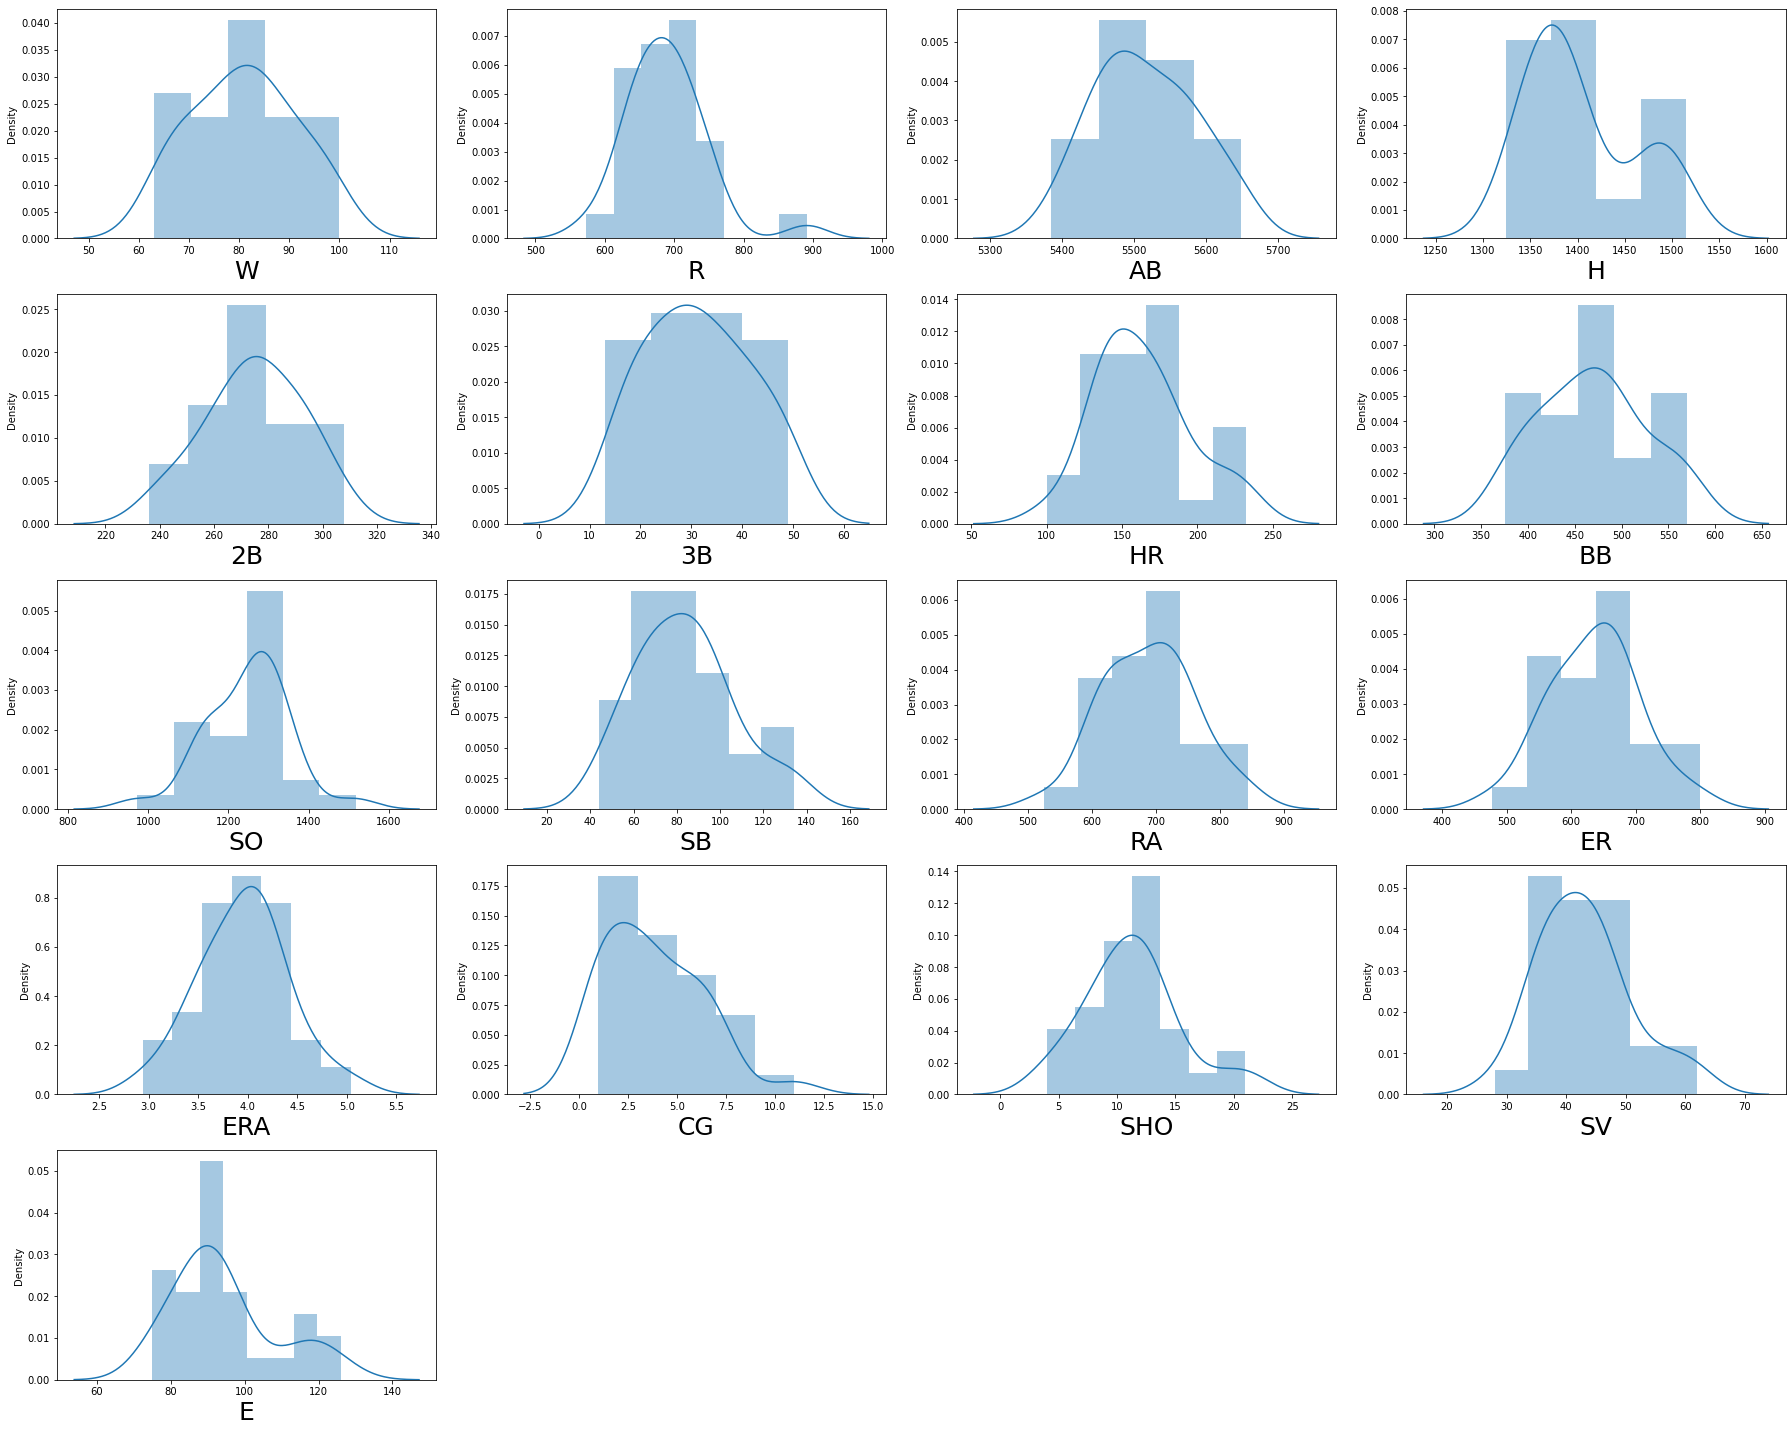

In [41]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

## Box Plot

W         AxesSubplot(0.125,0.749828;0.168478x0.130172)
R      AxesSubplot(0.327174,0.749828;0.168478x0.130172)
AB     AxesSubplot(0.529348,0.749828;0.168478x0.130172)
H      AxesSubplot(0.731522,0.749828;0.168478x0.130172)
2B        AxesSubplot(0.125,0.593621;0.168478x0.130172)
3B     AxesSubplot(0.327174,0.593621;0.168478x0.130172)
HR     AxesSubplot(0.529348,0.593621;0.168478x0.130172)
BB     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
SO        AxesSubplot(0.125,0.437414;0.168478x0.130172)
SB     AxesSubplot(0.327174,0.437414;0.168478x0.130172)
RA     AxesSubplot(0.529348,0.437414;0.168478x0.130172)
ER     AxesSubplot(0.731522,0.437414;0.168478x0.130172)
ERA       AxesSubplot(0.125,0.281207;0.168478x0.130172)
CG     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
SHO    AxesSubplot(0.529348,0.281207;0.168478x0.130172)
SV     AxesSubplot(0.731522,0.281207;0.168478x0.130172)
E            AxesSubplot(0.125,0.125;0.168478x0.130172)
dtype: object

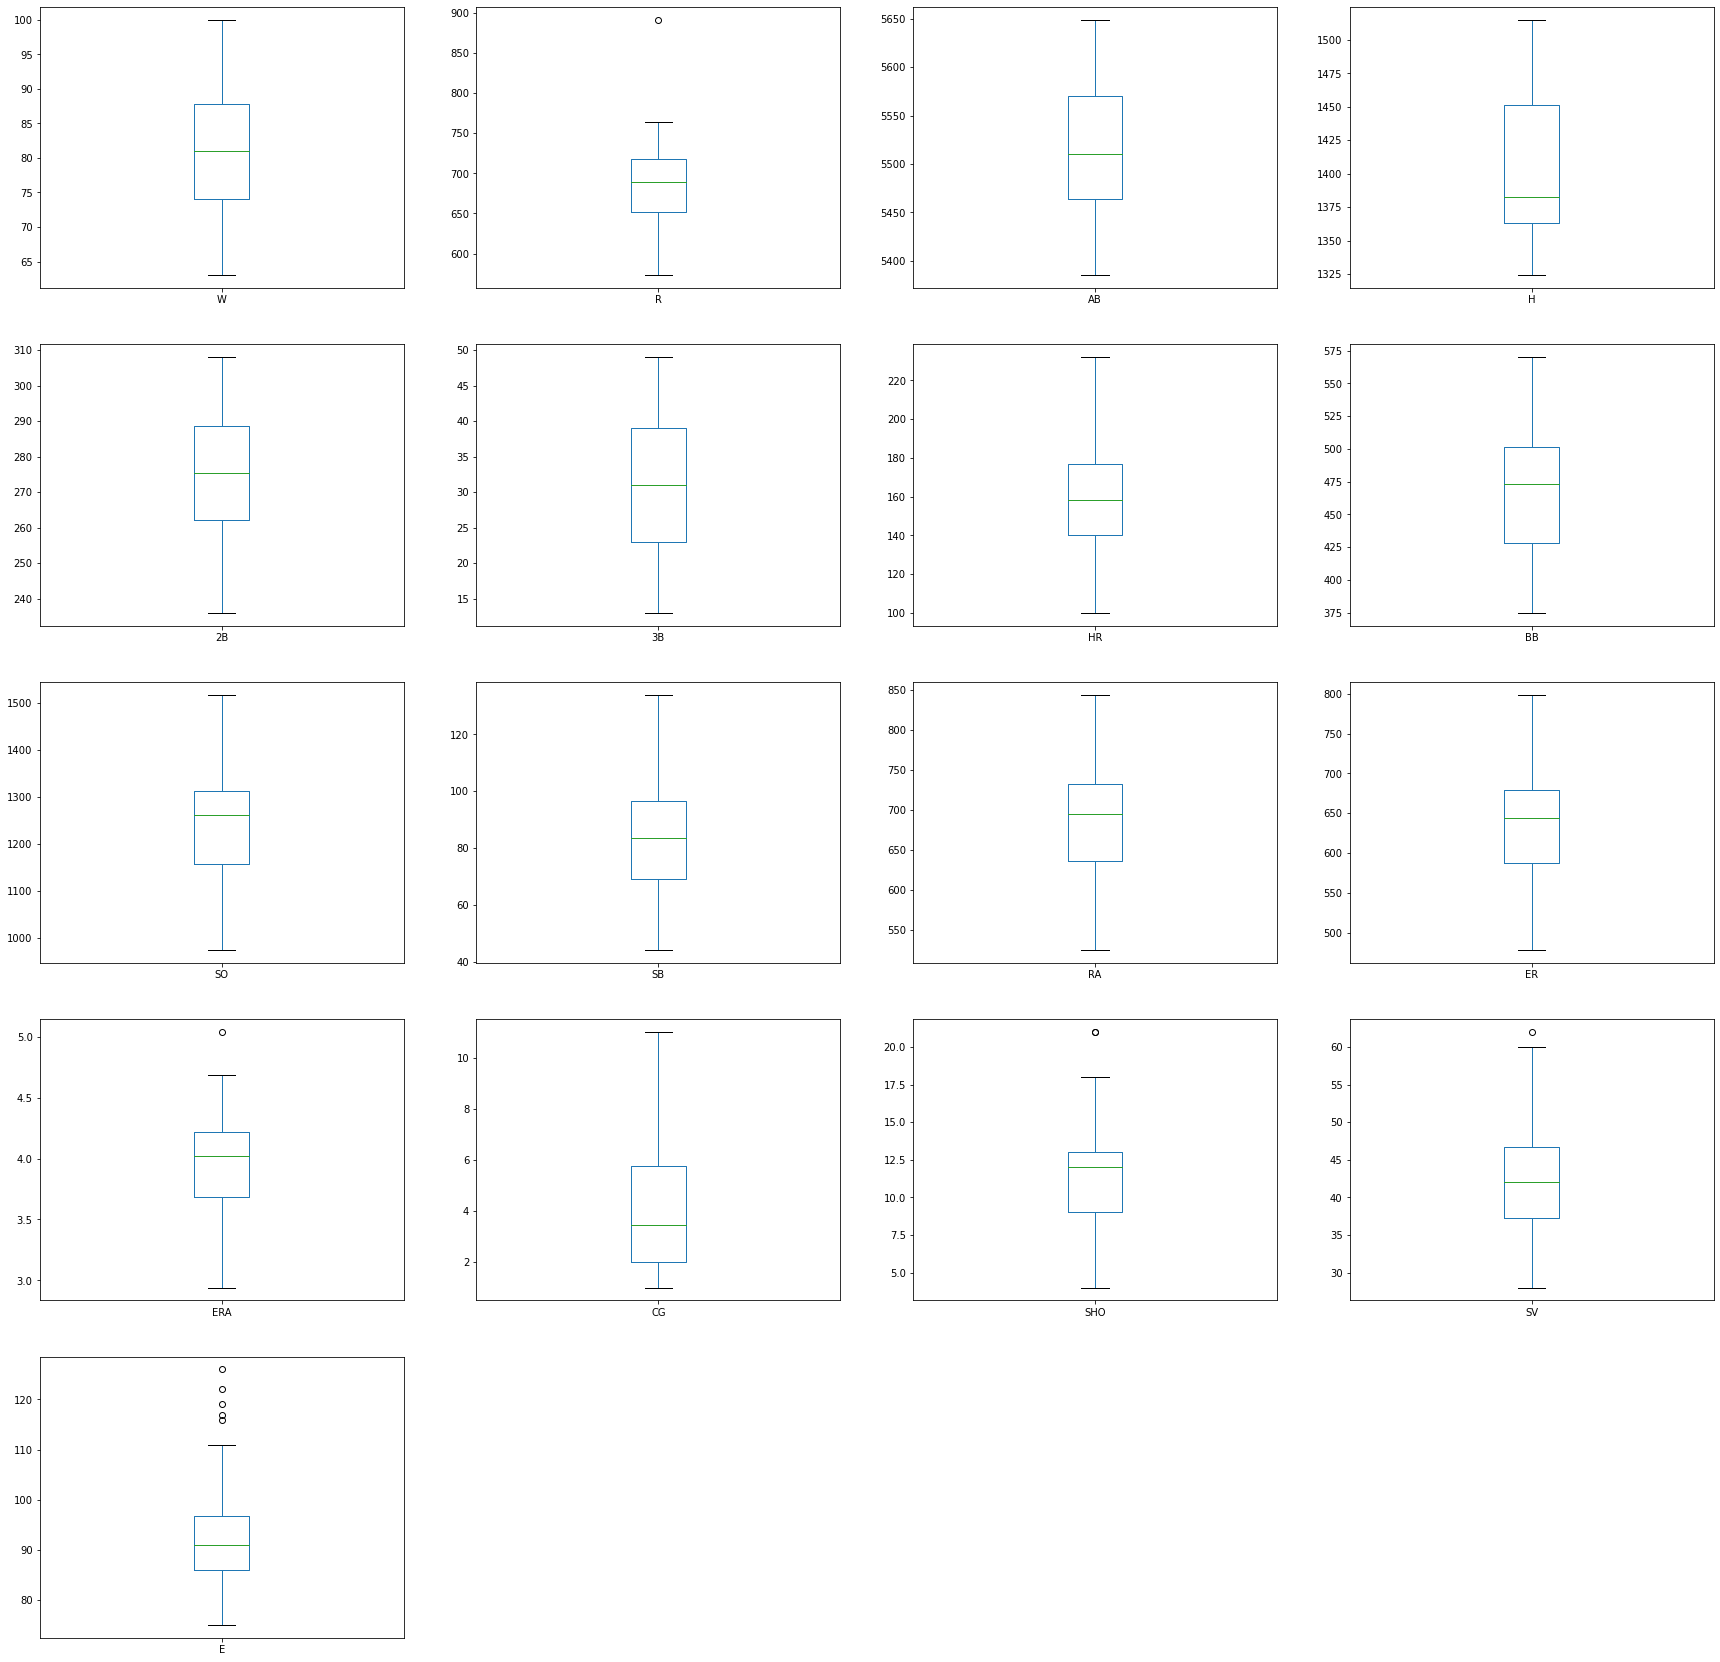

In [42]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))

### From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
### So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers i will be using z score below to remove outliers

## Z Score

In [43]:
# finding out the z score

z = np.abs(stats.zscore(df))
print(z)

[[1.36540860e+00 6.19077968e-01 8.47731264e-01 1.66368512e+00
  1.42017307e+00 1.04119304e+00 7.87298598e-01 1.53490242e+00
  2.69762957e+00 9.13883291e-01 6.66233927e-01 5.05110079e-01
  5.06955186e-01 7.36600107e-01 8.14628593e-01 1.67160651e+00
  4.61469635e-01]
 [1.97838300e-01 1.34431656e-01 7.11093535e-01 9.70680764e-01
  1.27403389e-01 1.23580856e+00 2.43966683e-01 5.36591904e-01
  1.54878442e-01 6.01825582e-01 1.65970766e-01 2.48929848e-01
  2.54597523e-01 7.36600107e-01 1.72800005e-01 2.49879323e-01
  6.07196888e-01]
 [3.24325082e-03 3.32905860e-01 1.11523330e+00 1.51891367e-01
  1.58879521e+00 2.23807850e-01 7.23377196e-01 1.13914361e+00
  8.93981893e-01 1.11449182e-01 6.80339091e-01 7.51623132e-01
  6.41346840e-01 2.91931954e+00 3.20914294e-01 6.54856158e-01
  1.11724227e+00]
 [4.83244373e-01 1.14641931e+00 2.41521620e-01 4.01088140e-01
  8.28122030e-01 4.18423371e-01 8.83180700e-01 1.16053598e+00
  1.68601848e-01 6.90984928e-01 1.80075931e-01 1.03922169e-01
  5.30100415e-02

In [44]:
print(np.where(z > 3)[0])
print(np.where(z > 3)[1])

[5]
[1]


In [45]:
index = (np.where(z > 3)[0])

In [46]:
df = df.drop(df.index[index])
df.shape

(29, 17)

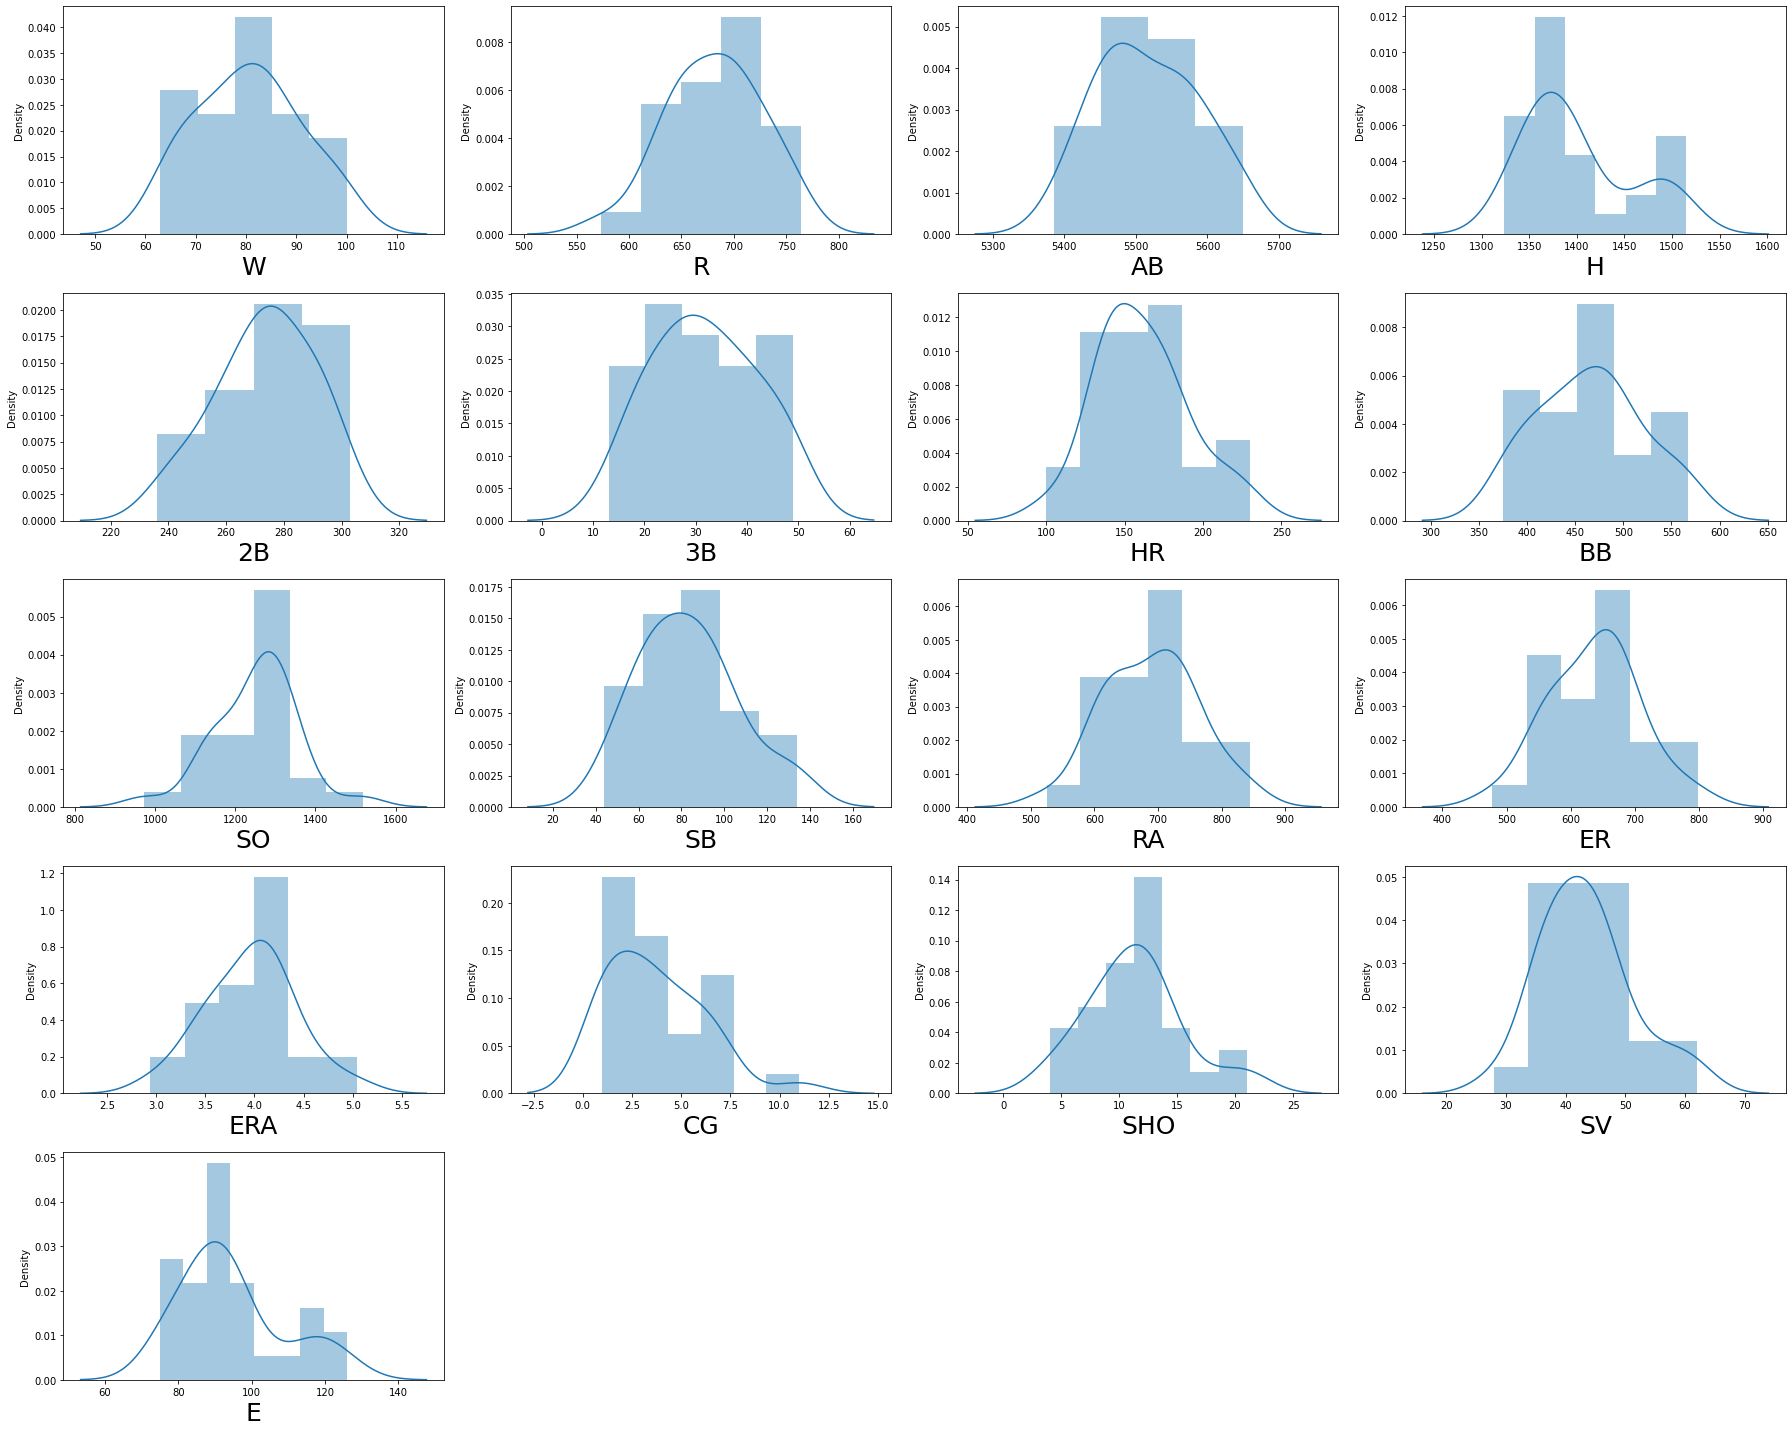

In [47]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

### After, removing the outlier’s final there are 29 rows and 17 columns presents in the data set.

In [48]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.703448,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.473452,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,1.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,2.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.466667,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### From the above dataset we can see that skewness, outliers are removed from dataset because the difference between mean and 50% is not much.
### There is no zero or duplicate values in the dataset as min rows doesn't contain any value in zero.
### The total number of counts is also equal in all the columns.
### Hence i am good to go for model building

In [49]:
df.drop('ERA',axis=1,inplace=True)

In [50]:
df.drop('ER',axis=1,inplace=True)

In [61]:
df.drop('H',axis=1,inplace=True)

In [62]:
# dividing features and label

x = df.drop('W',axis=1)
y = df.W

### We are dividing the 17 columns from the dataset into features and label.

## StandardScaler

In [63]:
# standard scaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.95939835,  0.83008422,  1.55653766,  1.01084549, -0.76586314,
        -1.53635899, -2.72762331,  0.9059529 , -0.66451353, -0.70088293,
        -0.81326172,  1.64315663, -0.47109143],
       [ 0.33114717, -0.70283074,  0.20117132,  1.20891656, -0.18138864,
        -0.49502051,  0.12189552, -0.58531515,  0.15463823, -0.70088293,
         0.15929869,  0.21100645, -0.61489829],
       [-0.27466646, -1.10025314,  1.73332457, -0.2766165 , -0.69710144,
         1.25294051, -0.9258657 ,  0.11645805, -0.67839746,  3.00216249,
        -0.32698152, -0.70036184, -1.1182223 ],
       [-1.32923093,  0.23395062, -0.8006212 , -0.47468758, -0.8690057 ,
        -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,  1.35636453,
        -0.57012162, -0.83055731,  0.46365315],
       [ 0.17408438,  1.25589393,  0.90831897,  1.70409425, -0.35329291,
        -0.19749523,  0.07293472, -0.01512442,  1.58468284,  1.35636453,
         0.15929869, -1.09094826, -0.61489829],
       [ 1.85690002,  0.716534

## VIF - variance inflation factor

In [64]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,4.360556,R
1,2.391167,AB
2,2.850966,2B
3,3.168473,3B
4,4.607937,HR
5,2.432602,BB
6,2.009980,SO
7,1.651236,SB
8,4.606370,RA
9,1.803028,CG


### From vif score i have tried to find out which features are strongly related to each other. There are few columns need to drop from dataset as they are strongly related to each other. I have dropped ERA , ER and H columns from dataset as there vif score was above 5. Moreover if we include the dropped 3 columns for model building that our model score will be above 100% which is practically not possible.

## Model Building

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

## Linear Regression model

In [66]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [67]:
# adjusted r2 score
rg.score(x_train,y_train)

0.9468302772667535

In [68]:
rg.score(x_test,y_test)

0.6918812492655553

In [69]:
y_pred = rg.predict(x_test)
y_pred

array([67.55313226, 80.89602875, 73.90645106, 79.81124744, 72.83268387,
       88.16315504, 75.94636798, 95.8013791 ])

In [70]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

27.648843522936183

In [72]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.258216762642653

In [73]:
r2_score(y_test,y_pred)

0.6918812492655553

### Linear Regression model - 69.1%

## Random Forest Regressor Model

In [74]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [75]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9143271878301289

In [76]:
rf.score(x_test,y_test)

0.7947605084450634

In [77]:
y_pred = rf.predict(x_test)
y_pred

array([70.59, 81.5 , 78.45, 88.11, 75.42, 90.08, 77.12, 90.08])

In [78]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

18.417037500000013

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.291507602230248

In [80]:
r2_score(y_test,y_pred)

0.7947605084450634

### Random Forest Regressor Model 79.4%

## Decision Tree Regressor Model

In [82]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [83]:
# adjusted r2 score
dt.score(x_train,y_train)

1.0

In [84]:
dt.score(x_test,y_test)

0.5988159498519937

In [85]:
y_pred = dt.predict(x_test)
y_pred

array([79., 83., 83., 97., 67., 97., 80., 97.])

In [86]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

36.0

In [87]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.0

In [88]:
r2_score(y_test,y_pred)

0.5988159498519937

### Decision Tree Regressor Model - 59.8%

## Regularization

In [94]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [95]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [96]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

0.24458945427646778

In [97]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.24458945427646778)

In [98]:
lasso_reg.score(x_test,y_test)

0.8091347817893654

### After using best features with the help of lassocv our lasso score is 80.9% which is more than the score of 3 models predicted above.
### The highest score model is random forest regressor (79.4%), moreover lasso score(80.9%) it means lasso improved the score by 1% which is good.

## Conclusion

### According to the above 3 model prediction the best model is Random Forest Regressor Model - 79.4%

## Saving the Best Model

In [99]:
import pickle

In [100]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))